# Hierarchical Clustering
Some simple demos of hierarchical clustering.

## Example 1 Clustering Iris Flowers
A simple example to explore hierarchical clustering.

In [3]:
# Import Packages
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]
import numpy as np
from IPython.display import display
from sklearn import datasets

In [4]:
# import some data to play with
iris = datasets.load_iris() # see https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html 
feat = iris.feature_names
X = iris.data[:, 0:2]  # we only take the first two features. 
y = iris.target
y_name = ['Setosa', 'Versicolour', 'Virginica']
print(type(iris))
print(type(iris.data))
print(type(iris.target))
#  %whos

<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
iris.data[0:4,0:2]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1]])

In [6]:
# Cluster
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage="ward", n_clusters=3)
clustering.fit(X);

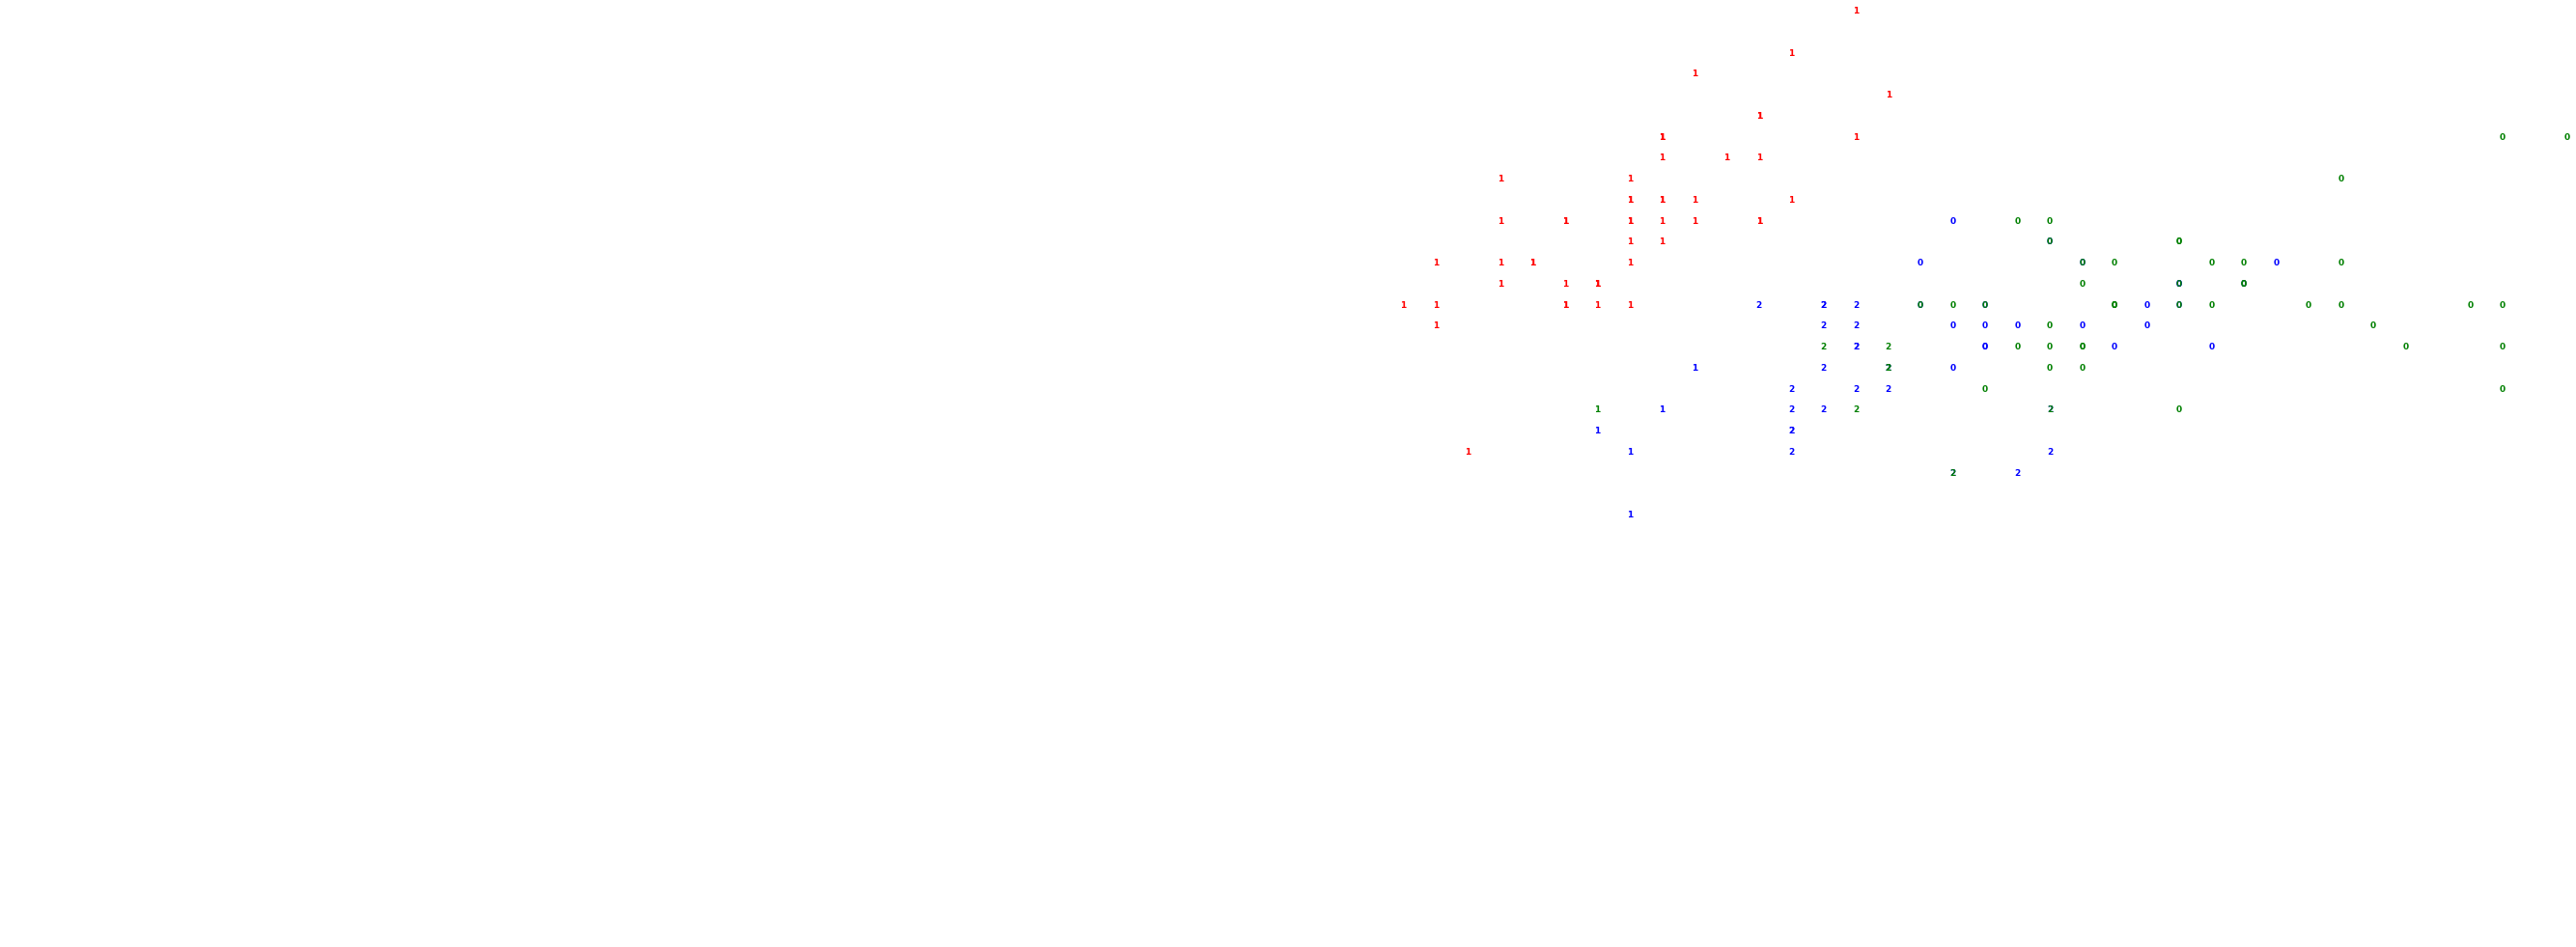

In [7]:
colours = 'rbg'
for i in range(X.shape[0]):
    plt.text(X[i, 0], X[i, 1], str(clustering.labels_[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 9}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## Standardise  Data

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

The MinMaxScaler is computed for feature $x_i$ as:


$$\frac{x_i-min(x)}{max(x)-min(x)}$$

This scales the range such that it is now between 0 and 1 (or -1 to 1 if there are negative values). It is sensitive to outliers.

In [8]:
from IPython.display import HTML

# Vimeo
HTML('<iframe width="800" height="600" src="https://d3c33hcgiwev3.cloudfront.net/YCqK7zHmEeiTdA5yoE99Fg.processed/full/360p/index.webm?Expires=1551744000&Signature=hKbfIYaZBscDGBMAX6oeoQK2LY~5MucOW9kEPM3C~AfndnD12qpxA3vXMgEFZIaJDTNUsAT8~VK89MgyFnaqHW1tK7~BC6jxQoxVeR7jzDjy9zibyO0y5EzgabS34WPTFT-23DAc7YEt3Aj8U9C7DGsAItiLUu7KpB86~QRjwqY_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A">')


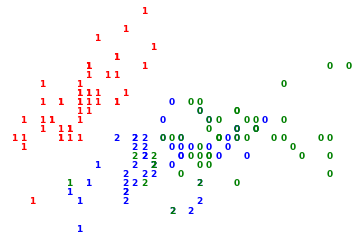

In [9]:
# MinMax scale the data so that it fits nicely onto the 0.0->1.0 axes of the plot.
from sklearn import preprocessing
X_plot = preprocessing.MinMaxScaler().fit_transform(X)

colours = 'rbg'
for i in range(X.shape[0]):
    plt.text(X_plot[i, 0], X_plot[i, 1], str(clustering.labels_[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 9}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## Example 2 Dendrogram with Simulated Data
A simple example to show dendrogram.

In [15]:
# Simulate data
X = np.array([[5,3],  
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

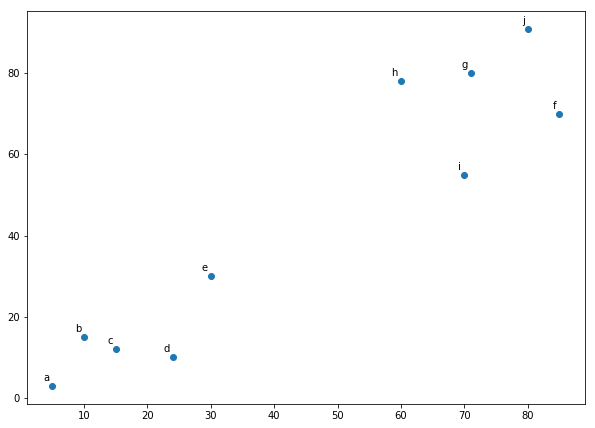

In [16]:
import matplotlib.pyplot as plt

#labels = range(1, 11)  
labels = ['a','b','c','d','e','f','g','h','i','j',] 
plt.figure(figsize=(10, 7))  
plt.subplots_adjust(bottom=0.1)  
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):  
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show() 

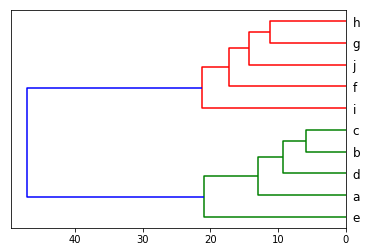

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

linked = linkage(X, 'single') #  combined into a single cluster 
  
dendrogram(linked,  
            orientation='left',
            labels=labels,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

## NMF

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f9/NMF.png" width="600">


In [18]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF

V = np.array([[0,1,0,1,0,0],
              [0,0,0,0,1,2],
              [2,3,1,1,0,0],
              [1,1,1,0,0,0],
              [0,0,0,0,2,3]
              ])

V = pd.DataFrame(V, columns=['John', 'Alice', 'Mary', 'Greg', 'Peter', 'Jennifer'])
V.index = ['Vegetables', 'Cigarettes', 'Yougurt', 'Fruits', 'Alcohol']
V

,John,Alice,Mary,Greg,Peter,Jennifer
Vegetables,0,1,0,1,0,0
Cigarettes,0,0,0,0,1,2
Yougurt,2,3,1,1,0,0
Fruits,1,1,1,0,0,0
Alcohol,0,0,0,0,2,3


In [19]:
nmf = NMF(2)
nmf.fit(V)

H = pd.DataFrame(np.round(nmf.components_,2), columns=V.columns)
H.index = ['Nice', 'Naughty']

In [20]:
H 

,John,Alice,Mary,Greg,Peter,Jennifer
Nice,1.04,1.59,0.61,0.55,0.00,0.00
Naughty,0.00,0.00,0.00,0.00,1.08,1.75


In [21]:
W = pd.DataFrame(np.round(nmf.transform(V),2), columns=H.index)
W.index = V.index
W

,Nice,Naughty
Vegetables,0.50,0.00
Cigarettes,0.00,1.08
Yougurt,1.87,0.00
Fruits,0.75,0.00
Alcohol,0.00,1.75
